In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [23]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [5]:
y = train['windmill_generated_power(kW/h)']

In [6]:
train.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


# Removing unwanted features

In [24]:
train.drop('tracking_id', axis=1, inplace=True)
train.drop("datetime", axis=1, inplace=True)

In [25]:
test_id = test['tracking_id']

In [26]:
test.drop('tracking_id', axis=1, inplace=True)
test.drop('datetime', axis=1, inplace=True)

# Seperating categorical and numerical data

In [27]:
train_cat = train.select_dtypes(object)
train_num = train.select_dtypes("float64")

In [28]:
test_cat = test.select_dtypes(object)
test_num = test.select_dtypes("float64")

# Filling null values

In [29]:
for col in train_num:
    if train[col].isnull().sum():
        col_mean = train[col].mean()
        train[col]=train[col].fillna(col_mean)
        
for col in train_cat:
    if train[col].isnull().sum():
        train[col] = train[col].fillna(method="ffill")


train_cat = train.select_dtypes(object)
train_num = train.select_dtypes("float64")

In [30]:
for col in test_num:
    if test[col].isnull().sum():
        col_mean = test[col].mean()
        test[col]=test[col].fillna(col_mean)
        
for col in test_cat:
    if test[col].isnull().sum():
        test[col] = test[col].fillna(method="ffill")


test_cat = test.select_dtypes(object)
test_num = test.select_dtypes("float64")

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wind_speed(m/s)                 28200 non-null  float64
 1   atmospheric_temperature(°C)     28200 non-null  float64
 2   shaft_temperature(°C)           28200 non-null  float64
 3   blades_angle(°)                 28200 non-null  float64
 4   gearbox_temperature(°C)         28200 non-null  float64
 5   engine_temperature(°C)          28200 non-null  float64
 6   motor_torque(N-m)               28200 non-null  float64
 7   generator_temperature(°C)       28200 non-null  float64
 8   atmospheric_pressure(Pascal)    28200 non-null  float64
 9   area_temperature(°C)            28200 non-null  float64
 10  windmill_body_temperature(°C)   28200 non-null  float64
 11  wind_direction(°)               28200 non-null  float64
 12  resistance(ohm)                 

# Encoding categorical data

In [32]:
from sklearn.preprocessing import LabelEncoder
for col in train_cat:
    le = LabelEncoder()
    train[col]=le.fit_transform(train_cat[col])

In [33]:
for col in test_cat:
    le = LabelEncoder()
    test[col]=le.fit_transform(test_cat[col])

In [34]:
train.head()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,20.799761,239.836388,2730.310605,42.084666,8,2,2.217542,0.314065,24.281689,6.766521
1,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,20.799761,337.944723,1780.207200,107.888643,1,2,4.210346,0.448494,27.262139,5.966275
2,95.484724,0.383727,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,4,2,2.719475,0.302321,27.366127,2.874342
3,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,4,2,4.857385,0.367140,24.287767,14.851089
4,10.722890,0.383727,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,2,2,2.254034,0.453374,27.971650,3.519074


In [35]:
train.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
count,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,2.820000e+04,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000
mean,69.037071,0.383727,40.085387,-9.654038,41.027755,42.614239,1710.819803,65.027857,5.318506e+04,32.735091,20.799761,306.888883,1575.560011,25.849894,6.499965,1.479539,2.254034,0.397249,25.887052,6.130529
std,75.905527,41.481572,27.203465,47.734286,43.662831,6.123243,826.853447,19.812283,1.782768e+05,7.703391,52.029149,121.321415,483.317824,32.093408,4.038583,0.520790,10.206698,0.061158,7.698401,2.687601
min,-496.211029,-99.000000,-99.000000,-146.259543,-244.974098,3.167151,500.000000,33.893779,-1.188624e+06,-30.000000,-999.000000,0.000000,-1005.222988,-136.732217,0.000000,0.000000,-99.000000,0.200111,-30.295253,0.962305
25%,21.250907,0.383727,41.632797,-1.206613,40.557993,41.911899,870.621152,41.200625,1.689269e+04,27.311644,20.799761,246.793261,1268.141402,13.829618,3.000000,1.000000,2.254034,0.347445,24.469380,4.076167
50%,93.256368,14.150602,43.685853,-0.527911,43.221521,43.524018,2031.299986,70.722083,1.875303e+04,32.605195,42.495191,290.113549,1678.231923,31.549128,7.000000,1.000000,3.049007,0.398591,25.899163,5.791403
75%,95.248020,22.575311,45.673234,5.370015,45.879212,45.173397,2462.164052,78.939478,1.164252e+05,38.232387,44.325305,332.325695,1829.044723,41.337104,10.000000,2.000000,4.156647,0.449354,27.451080,7.931295
max,601.455670,80.217444,169.820455,165.932123,999.000000,50.000000,3000.000000,100.000000,1.272552e+06,55.000000,323.000000,569.966479,4693.481933,236.883264,13.000000,2.000000,18.209800,0.499975,78.351335,20.175358


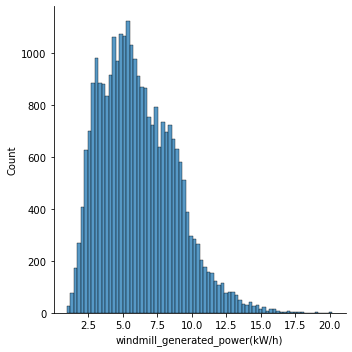

In [37]:
sns.displot(y)

In [38]:
print("Skewness: %f" % y.skew())

Skewness: 0.688935


In [41]:
for col in train_num:
    train[col] = np.log1p(train[col])

In [43]:
for col in test_num:
    test[col] = np.log1p(test[col])